In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.ops import math_ops
from common_models import ResNet34, ResNet50, ResNet152
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime, os
plt.style.use('seaborn')
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
print('Total Classes:', len(np.unique(np.reshape(y_train, -1))))

Total Classes: 10


In [6]:
features_dict = {
    0: 'airplane',
    1: 'car',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

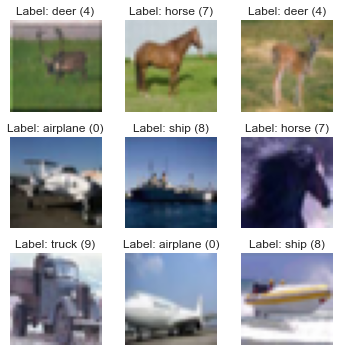

In [7]:
plt.figure(figsize = (5,5))
for i in range(1,10):
    plt.subplot(3,3,i)
    sample_index = np.random.randint(0,x_train.shape[0])
    sample_label = int(y_train[sample_index])
    plt.imshow(x_train[sample_index,:,:,:])
    plt.title(f'Label: {features_dict[sample_label]} ({sample_label})')
    plt.axis(False)
plt.tight_layout()
plt.show()

In [8]:
train_datagen = ImageDataGenerator(
                        rescale = 1./255,
                        rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        fill_mode='nearest')
train_datagen.fit(x_train)

x_test = x_test/255

###  Lets test the dataset using ResNet
- https://arxiv.org/pdf/1512.03385.pdf

In [9]:
model = ResNet50(n_classes = 10)

In [10]:
log_dir = os.path.join(r'.\logs\scalars',datetime.datetime.now().strftime("%Y%m%d-%H%M")) 

file_writer = tf.summary.create_file_writer(os.path.join(log_dir, 'metrics'))
file_writer.set_as_default()

def lr_scheduler(epoch):
    init_lr = 0.01
    decay_steps = 160
    decay_rate = 0.1
    stepwise = True
    
    p = epoch / decay_steps
    
    if stepwise is True: 
        p = math_ops.floor(p)
    
    lr_exp_decay = math_ops.multiply(init_lr, math_ops.pow(decay_rate, p))
    tf.summary.scalar('learning rate', data=lr_exp_decay, step=epoch)
    return lr_exp_decay
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

optimizer = tf.keras.optimizers.SGD(momentum=0.9,
                                    decay = 0.0001)

model.compile(loss ='sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

In [13]:
%tensorboard --logdir logs/scalars --host localhost --port 8089

Reusing TensorBoard on port 8089 (pid 16112), started 12:36:22 ago. (Use '!kill 16112' to kill it.)

In [14]:
history = model.fit(train_datagen.flow(x_train, y_train, batch_size = 256),
                    epochs = 150,
                    validation_data = (x_test, y_test),
                    callbacks = [tensorboard_callback, lr_callback],
                    verbose = 1)
#lr_callback

Train for 196 steps, validate on 10000 samples
Epoch 1/150
196/196 [==============================] - 65s 334ms/step - loss: 2.5302 - accuracy: 0.1731 - val_loss: 25.1191 - val_accuracy: 0.1148
Epoch 2/150
196/196 [==============================] - 38s 192ms/step - loss: 2.2609 - accuracy: 0.2201 - val_loss: 2.4216 - val_accuracy: 0.1394
Epoch 3/150
196/196 [==============================] - 38s 193ms/step - loss: 2.0664 - accuracy: 0.2854 - val_loss: 1.9715 - val_accuracy: 0.2530
Epoch 4/150
196/196 [==============================] - 38s 193ms/step - loss: 1.9742 - accuracy: 0.3243 - val_loss: 1.8721 - val_accuracy: 0.3335
Epoch 5/150
196/196 [==============================] - 38s 192ms/step - loss: 1.8758 - accuracy: 0.3506 - val_loss: 1.7169 - val_accuracy: 0.4047
Epoch 6/150
196/196 [==============================] - 38s 191ms/step - loss: 1.8265 - accuracy: 0.3647 - val_loss: 1.6973 - val_accuracy: 0.4056
Epoch 7/150
196/196 [==============================] - 38s 192ms/step - loss

196/196 [==============================] - 38s 194ms/step - loss: 1.1606 - accuracy: 0.5869 - val_loss: 1.1018 - val_accuracy: 0.6197
Epoch 56/150
196/196 [==============================] - 38s 193ms/step - loss: 1.1572 - accuracy: 0.5845 - val_loss: 1.1449 - val_accuracy: 0.6022
Epoch 57/150
196/196 [==============================] - 37s 189ms/step - loss: 1.1514 - accuracy: 0.5888 - val_loss: 1.0988 - val_accuracy: 0.6082
Epoch 58/150
196/196 [==============================] - 38s 193ms/step - loss: 1.1466 - accuracy: 0.5899 - val_loss: 1.1881 - val_accuracy: 0.5894
Epoch 59/150
196/196 [==============================] - 38s 192ms/step - loss: 1.1393 - accuracy: 0.5928 - val_loss: 1.0970 - val_accuracy: 0.6220
Epoch 60/150
196/196 [==============================] - 39s 197ms/step - loss: 1.1359 - accuracy: 0.5952 - val_loss: 1.0751 - val_accuracy: 0.6173
Epoch 61/150
196/196 [==============================] - 37s 188ms/step - loss: 1.1274 - accuracy: 0.5971 - val_loss: 1.0559 - val_a

196/196 [==============================] - 38s 195ms/step - loss: 0.9471 - accuracy: 0.6597 - val_loss: 1.2286 - val_accuracy: 0.6455
Epoch 111/150
196/196 [==============================] - 38s 194ms/step - loss: 0.9341 - accuracy: 0.6669 - val_loss: 1.5422 - val_accuracy: 0.6416
Epoch 112/150
196/196 [==============================] - 38s 195ms/step - loss: 0.9314 - accuracy: 0.6667 - val_loss: 2.0342 - val_accuracy: 0.6529
Epoch 113/150
196/196 [==============================] - 39s 199ms/step - loss: 0.9295 - accuracy: 0.6679 - val_loss: 1.1525 - val_accuracy: 0.6458
Epoch 114/150
196/196 [==============================] - 38s 195ms/step - loss: 0.9293 - accuracy: 0.6665 - val_loss: 1.2690 - val_accuracy: 0.6455
Epoch 115/150
196/196 [==============================] - 38s 196ms/step - loss: 0.9261 - accuracy: 0.6690 - val_loss: 1.1574 - val_accuracy: 0.6553
Epoch 116/150
196/196 [==============================] - 37s 188ms/step - loss: 0.9200 - accuracy: 0.6715 - val_loss: 1.4186 -

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

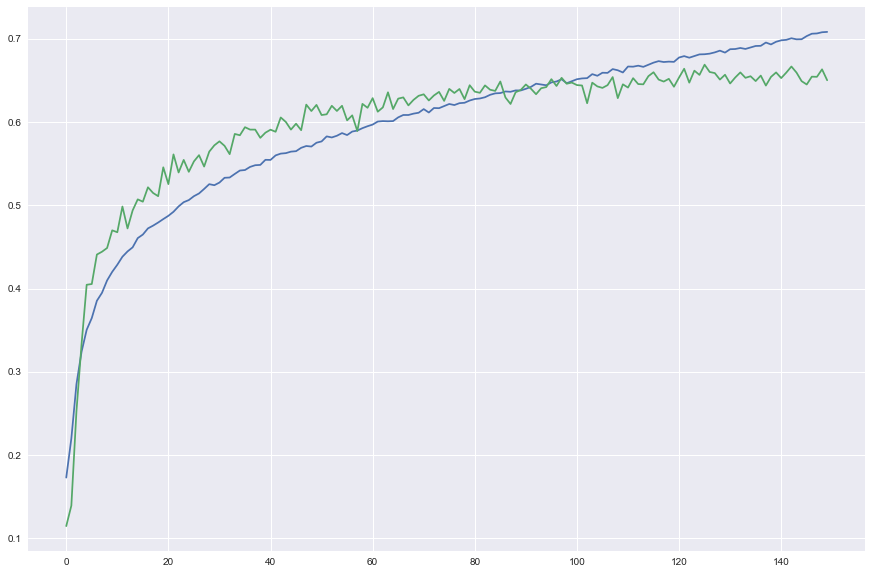

In [16]:
plt.figure(figsize = (15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()